<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 2</h2></center>
<center><h3>Fundamentos: Análisis espectral</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Cristóbal Antonio Moraga Acosta </h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Carga archivos y carga datos en python
<p align="justify">
Una de las tareas más importantes es la de cargar archivos que incluyan datos para el procesamiento.

<p align="justify">
Debes cargar los dos archivos en formato txt y CSV, adquirir los datos y presentarlos en graficos usando la librería Matplotlib
    
    

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


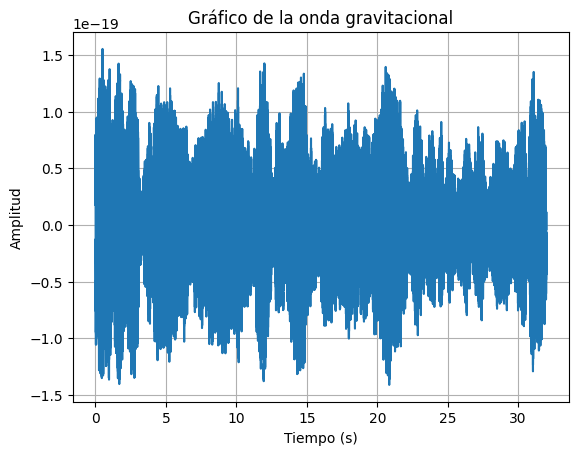

In [8]:
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt

# Ruta del archivo
ruta_archivo = '/content/drive/MyDrive/Colab Notebooks/H-H1_GWOSC_16KHZ_R1-1268431079-32.txt'
# Leer datos del archivo, ignorando los comentarios
with open(ruta_archivo, 'r') as archivo:
    # Ignoramos las primeras 3 líneas (comentarios)
    for _ in range(3):
        next(archivo)
    # Leer los datos restantes
    datos = [float(linea.strip()) for linea in archivo]

frecuencia_muestreo = 16384  # muestras por seg
duracion = 32  # seg
tiempo = [(1.0 / frecuencia_muestreo) * i for i in range(len(datos))]

# Graficar los datos
plt.plot(tiempo, datos)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Gráfico de la onda gravitacional')
plt.grid(True)
plt.show()


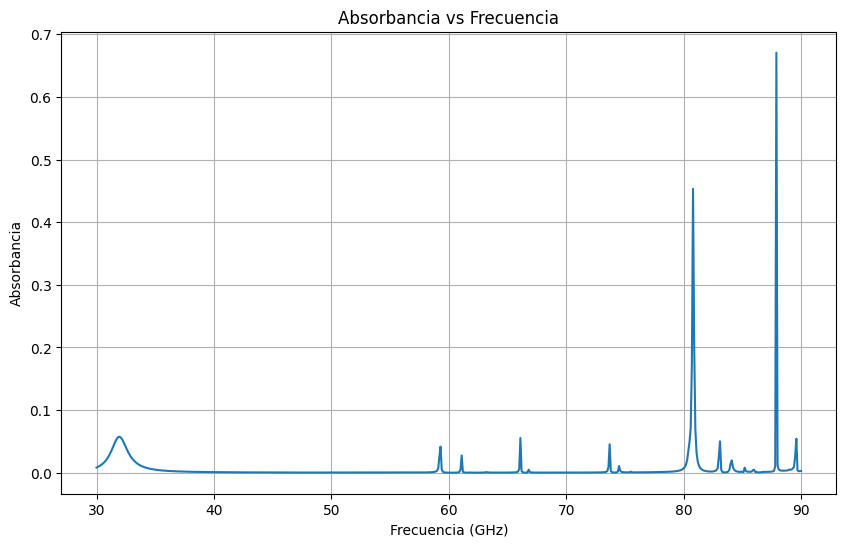

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Ruta del archivo
ruta_archivo = '/content/drive/MyDrive/Colab Notebooks/AbsorbanceTE_0-0.csv'

# Cargar los datos usando np.genfromtxt y saltando las primeras dos filas
datos_csv = np.genfromtxt(ruta_archivo, delimiter=',', skip_header=1)

# Datos de frecuencia y absorbancia
frecuencia = datos_csv[:, 0]
absorbancia = datos_csv[:, 1]

# Grafica de los datos
plt.figure(figsize=(10, 6))
plt.plot(frecuencia, absorbancia)
plt.xlabel('Frecuencia (GHz)')
plt.ylabel('Absorbancia')
plt.title('Absorbancia vs Frecuencia')
plt.grid(True)
plt.show()

## 2. Señal
<p align="justify">
Crea una señal continua (la suma de dos senoidales/cosenoidales, exponenciales) que utilizaras para las demostraciones siguientes. Presenta la función que usaste en una gráfica de tal forma que la ecuación esté incluida en dicha gráfica.

Incluye la ecuación en una celda de tu notebook usando LATEX.


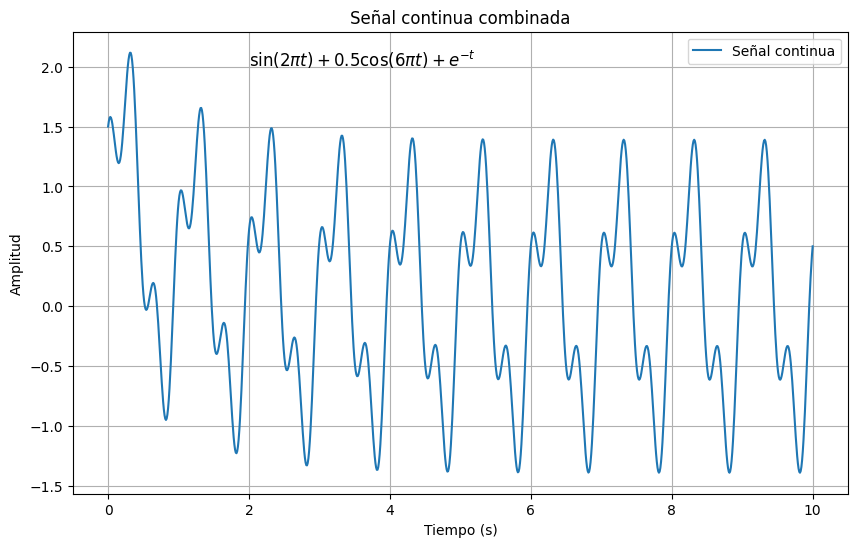

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Vector de tiempo
t = np.linspace(0, 10, 1000)

# Definir las funciones componentes
f1 = np.sin(2 * np.pi * 1 * t)  # señal seno a 1 Hz
f2 = 0.5 * np.cos(2 * np.pi * 3 * t)  # señal coseno a 3 Hz
f3 = np.exp(-t)  # Función exponencial decreciente

# se suman las funciones componentes para crear la señal continua
senal = f1 + f2 + f3

# Graficar la señal
plt.figure(figsize=(10, 6))
plt.plot(t, senal, label='Señal continua')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal continua combinada')
ecuacion = r'$\sin(2\pi t) + 0.5\cos(6\pi t) + e^{-t}$'
plt.text(2, 2, ecuacion, fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

## 3. Sampleo
<p align="justify">
En este punto debes comprobar como se da la operación de sampleo y que sucede ante cambios en el intervalo de sampleo.    


### 3.1 Crea una señal impulso (delta) y desplazala
Para esto puedes usar alguna librería de python

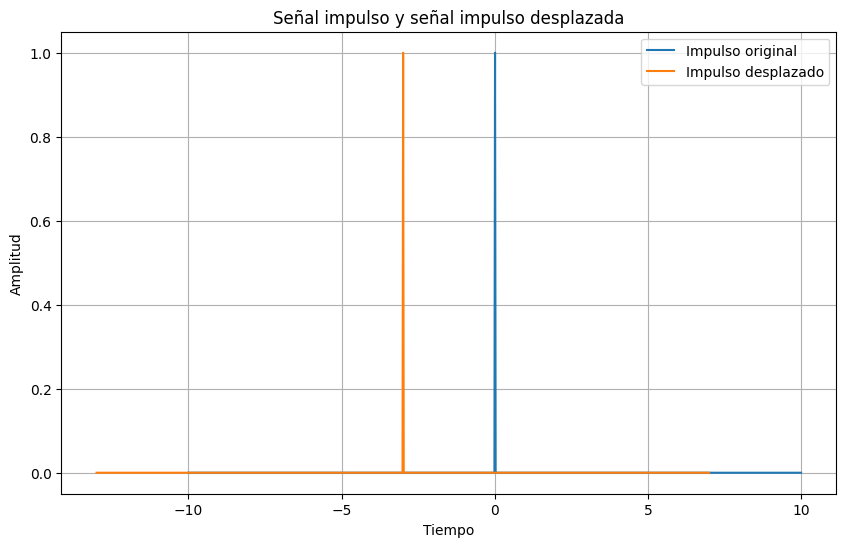

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import unit_impulse

# Vector tiempo
t = np.linspace(-10, 10, 1000)  # Definir el dominio de la señal
impulso = unit_impulse(len(t), 'mid')  # Señal impulso en el punto medio del dominio

# Desplazamiento de la señal impulso
desplazamiento = 3  # Desplazar la señal 3 unidades a la derecha
t_desplazado = t - desplazamiento
impulso_desplazado = unit_impulse(len(t_desplazado), 'mid')  # Crear el impulso desplazado

# Graficar la señal impulso y la señal impulso desplazada
plt.figure(figsize=(10, 6))
plt.plot(t, impulso, label='Impulso original')
plt.plot(t_desplazado, impulso_desplazado, label='Impulso desplazado')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal impulso y señal impulso desplazada')
plt.legend()
plt.grid(True)
plt.show()

### 3.2 Genere una señal Senoidal y realice la operación de sampleo
Puedes utilizar el método "stem" de matplotlib para plotear el resultado.

<ipython-input-27-0866de96a430>:26: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(t_muestreo, senal_muestreada, label='Señal Muestreada', basefmt=' ', use_line_collection=True, linefmt='red')


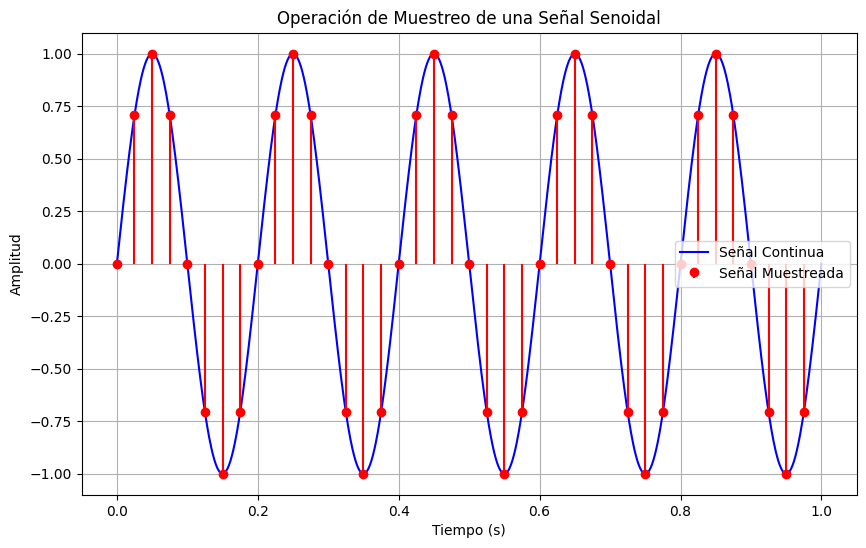

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal senoidal
frecuencia = 5  #  Hz
amplitud = 1
fase = 0
tiempo_final = 1
frecuencia_muestreo = 40

# Vector tiempo
t_continuo = np.linspace(0, tiempo_final, 1000)

# Señal senoidal continua
senal_continua = amplitud * np.sin(2 * np.pi * frecuencia * t_continuo + fase)

# Muestreo de la señal
t_muestreo = np.arange(0, tiempo_final, 1 / frecuencia_muestreo)
senal_muestreada = amplitud * np.sin(2 * np.pi * frecuencia * t_muestreo + fase)

# Grafica de la señal senoidal continua
plt.figure(figsize=(10, 6))
plt.plot(t_continuo, senal_continua, label='Señal Continua', color='blue')

# Grafica de los puntos muestreados
plt.stem(t_muestreo, senal_muestreada, label='Señal Muestreada', basefmt=' ', use_line_collection=True, linefmt='red')

plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Operación de Muestreo de una Señal Senoidal')
plt.legend()
plt.grid(True)
plt.show()

### 3.3 Genere una señal Triangular y realice la operación de sampleo

<ipython-input-13-f2ac6460b357>:25: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(t_muestreo, senal_muestreada, label='Señal Muestreada', basefmt=' ', use_line_collection=True, linefmt='red')


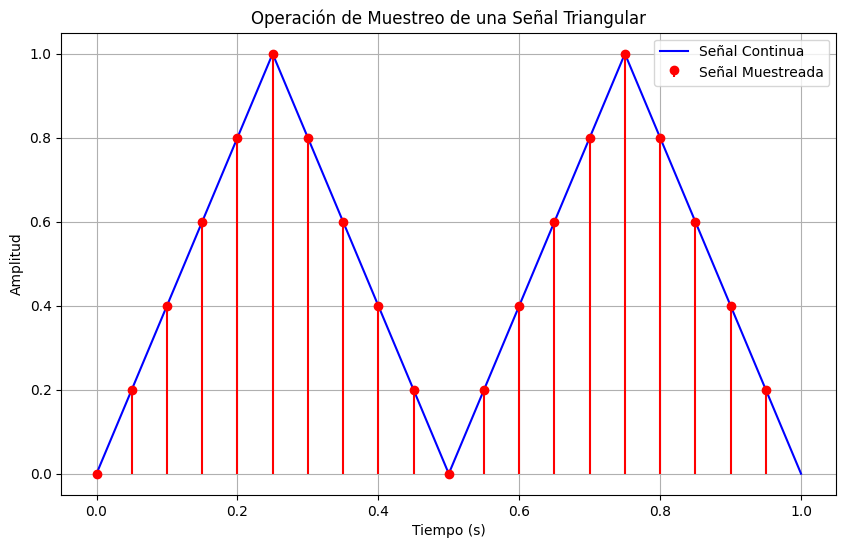

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal triangular
frecuencia = 2
amplitud = 1
tiempo_final = 1
frecuencia_muestreo = 20

# Vector tiempo
t_continuo = np.linspace(0, tiempo_final, 1000)

# Señal triangular continua
senal_continua = amplitud * np.abs(2 * (t_continuo * frecuencia - np.floor(t_continuo * frecuencia + 0.5)))

# Muestreo
t_muestreo = np.arange(0, tiempo_final, 1 / frecuencia_muestreo)
senal_muestreada = amplitud * np.abs(2 * (t_muestreo * frecuencia - np.floor(t_muestreo * frecuencia + 0.5)))

# Grafica de la señal triangular continua
plt.figure(figsize=(10, 6))
plt.plot(t_continuo, senal_continua, label='Señal Continua', color='blue')

# Grafica de los puntos muestreados
plt.stem(t_muestreo, senal_muestreada, label='Señal Muestreada', basefmt=' ', use_line_collection=True, linefmt='red')

plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Operación de Muestreo de una Señal Triangular')
plt.legend()
plt.grid(True)
plt.show()


### 3.4 Realice la operación de sampleo sobre la señal que generaste en el punto 2

<ipython-input-14-00f50b33dd9f>:24: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(t_muestreo, senal_muestreada, label='Señal muestreada', basefmt=' ', use_line_collection=True)


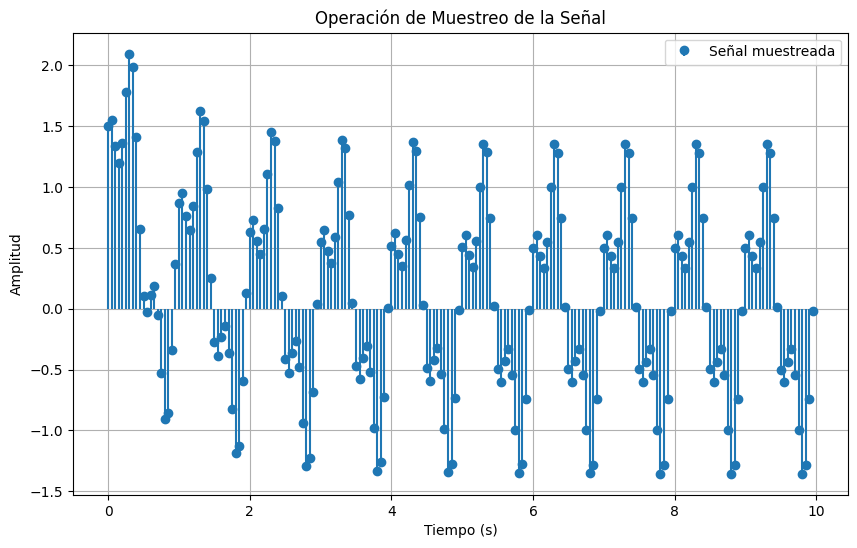

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Vector tiempo
t = np.linspace(0, 10, 1000)

# Definir las funciones componentes
f1 = np.sin(2 * np.pi * 1 * t)  # señal seno a 1 Hz
f2 = 0.5 * np.cos(2 * np.pi * 3 * t)  # señal coseno a 3 Hz
f3 = np.exp(-t)  # Función exponencial decreciente

# se suman las funciones componentes para crear la señal continua
senal = f1 + f2 + f3

# Frecuencia de muestreo (Hz)
frecuencia_muestreo = 20

# Muestreo de la señal
t_muestreo = np.arange(0, 10, 1 / frecuencia_muestreo)
senal_muestreada = np.interp(t_muestreo, t, senal)

# Grafica de la señal muestreada
plt.figure(figsize=(10, 6))
plt.stem(t_muestreo, senal_muestreada, label='Señal muestreada', basefmt=' ', use_line_collection=True)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Operación de Muestreo de la Señal')
plt.legend()
plt.grid(True)
plt.show()

### 3.5 Compruebe el teorema de Nyquist
Para comprobarlo, debes evaluar algunos casos:
1. la frecuencia de sampleo _f_ es mayor que la frecuencia máxima de tu señal, Fmax.
2. la frecuencia de sampleo _f_ es mayor que 2*Fmax.
3. la frecuencia de sampleo _f_ es mayor que 5*Fmax.

<p align="justify">
Debe graficar:

1. la señal original.
2. la señal sampleada.
3. la señal reconstruida a partir del sampleo.

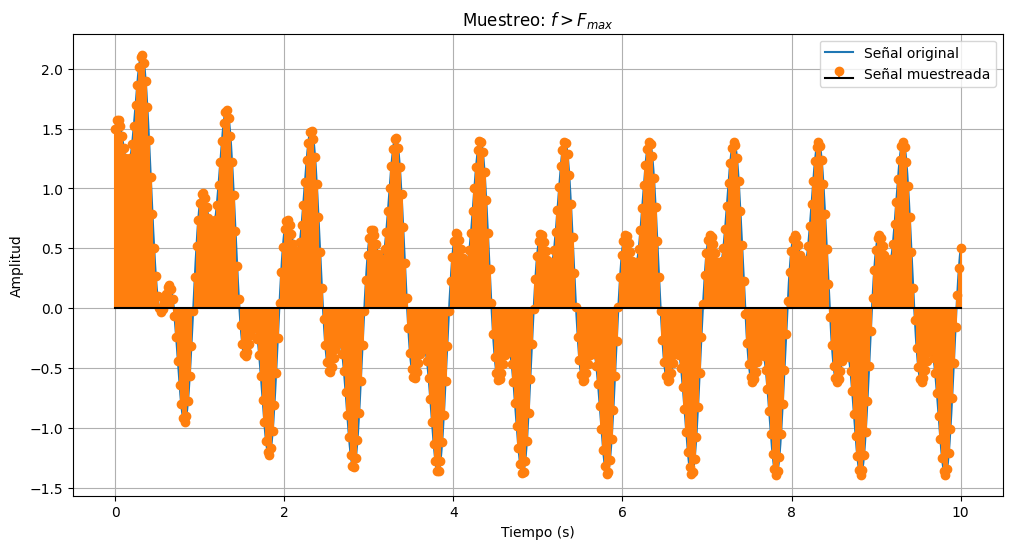

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Vector tiempo
t = np.linspace(0, 10, 1000)

# Definir las funciones componentes
f1 = np.sin(2 * np.pi * 1 * t)  # Una senoide con frecuencia 1 Hz
f2 = 0.5 * np.cos(2 * np.pi * 3 * t)  # Una cosenoide con frecuencia 3 Hz
f3 = np.exp(-t)  # Una función exponencial decreciente

# Se suman las funciones componentes para crear la señal continua
senal = f1 + f2 + f3

# Frecuencia de muestreo
frecuencia_muestreo = 50  # mayor que las frecuencias máximas

# Muestreo
t_muestreo = np.linspace(0, 10, 500)  # Muestreo a 50 Hz
senal_muestreada = np.sin(2 * np.pi * 1 * t_muestreo) + 0.5 * np.cos(2 * np.pi * 3 * t_muestreo) + np.exp(-t_muestreo)

# Graficar la señal original y la señal muestreada
plt.figure(figsize=(12, 6))
plt.plot(t, senal, label='Señal original')
plt.stem(t_muestreo, senal_muestreada, label='Señal muestreada', linefmt='C1-', markerfmt='C1o', basefmt='k')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Muestreo: $f > F_{max}$')
plt.legend()
plt.grid(True)
plt.show()




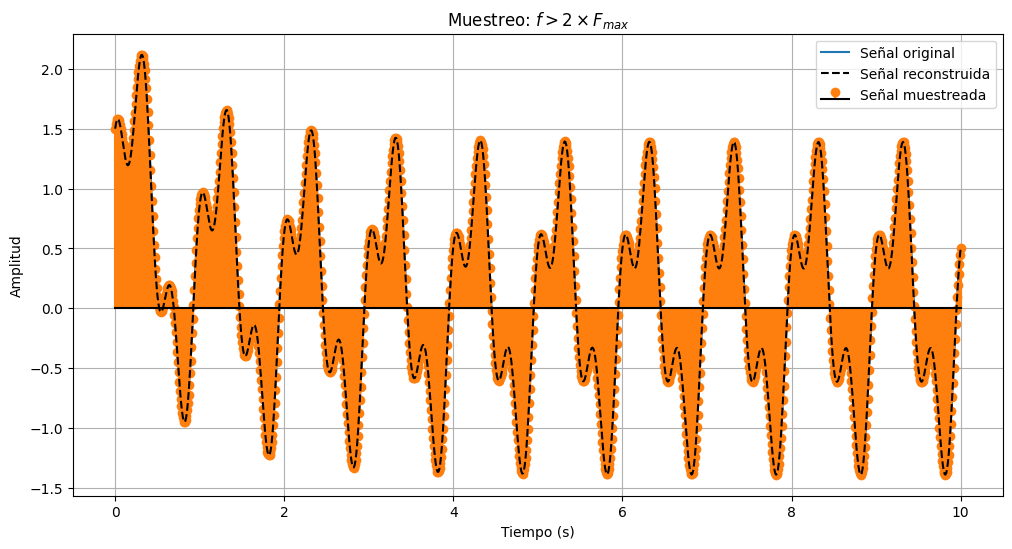

In [35]:
# Frecuencia de muestreo
frecuencia_muestreo = 120  # mayor que el doble de las frecuencias máximas

# Muestreo
t_muestreo = np.linspace(0, 10, 1200)  # Muestreo a 120 Hz
senal_muestreada = np.sin(2 * np.pi * 1 * t_muestreo) + 0.5 * np.cos(2 * np.pi * 3 * t_muestreo) + np.exp(-t_muestreo)

# Reconstruccion de la señal a partir de las muestras
senal_reconstruida = np.sin(2 * np.pi * 1 * t) + 0.5 * np.cos(2 * np.pi * 3 * t) + np.exp(-t)

# Graficar la señal original, la señal muestreada y la señal reconstruida
plt.figure(figsize=(12, 6))
plt.plot(t, senal, label='Señal original')
plt.stem(t_muestreo, senal_muestreada, label='Señal muestreada', linefmt='C1-', markerfmt='C1o', basefmt='k')
plt.plot(t, senal_reconstruida, label='Señal reconstruida', linestyle='dashed', color='black')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Muestreo: $f > 2 \\times F_{max}$')
plt.legend()
plt.grid(True)
plt.show()


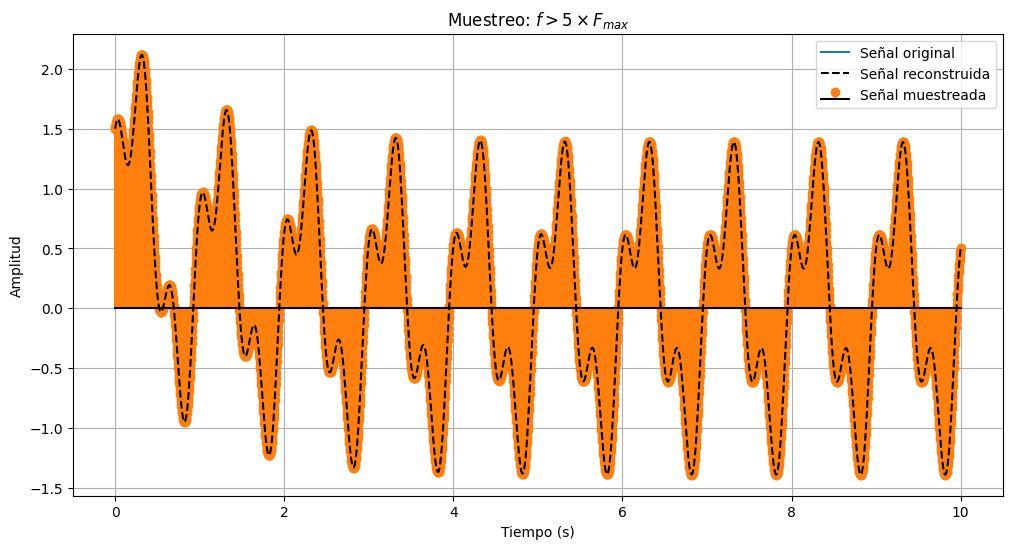

In [36]:
# Frecuencia de muestreo
frecuencia_muestreo = 300  # mayor que cinco veces las frecuencias máximas

# Muestreo
t_muestreo = np.linspace(0, 10, 3000)
senal_muestreada = np.sin(2 * np.pi * 1 * t_muestreo) + 0.5 * np.cos(2 * np.pi * 3 * t_muestreo) + np.exp(-t_muestreo)

# Reconstruccion de la señal a partir de las muestras
senal_reconstruida = np.sin(2 * np.pi * 1 * t) + 0.5 * np.cos(2 * np.pi * 3 * t) + np.exp(-t)

# Graficar la señal original, la señal muestreada y la señal reconstruida
plt.figure(figsize=(12, 6))
plt.plot(t, senal, label='Señal original')
plt.stem(t_muestreo, senal_muestreada, label='Señal muestreada', linefmt='C1-', markerfmt='C1o', basefmt='k')
plt.plot(t, senal_reconstruida, label='Señal reconstruida', linestyle='dashed', color='black')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Muestreo: $f > 5 \\times F_{max}$')
plt.legend()
plt.grid(True)
plt.show()


### 3.6 Explica tus hallazgos

Al comprobar el teorema de Nyquist para diferentes frecuencias de muestreo en relación con la frecuencia máxima de la señal, podemos llegar a varias conclusiones:



1.   Caso 1 (f > Fmax):
*   Cuando la frecuencia de muestreo es mayor que la frecuencia máxima de la señal, se pueden capturar adecuadamente las características de la señal original.
*   La señal muestreada es una representación precisa de la señal original y se puede reconstruir de manera efectiva.
2.   Caso 2 (f > 2*Fmax):
*   Con una frecuencia de muestreo que es al menos el doble de la frecuencia máxima de la señal, la señal muestreada sigue capturando adecuadamente la información espectral de la señal original.
*   La reconstrucción de la señal a partir de las muestras sigue siendo precisa, con una pérdida mínima de información.
3.  Caso 3 (f > 5*Fmax):
*   Incluso con una frecuencia de muestreo que es cinco veces la frecuencia máxima de la señal, la señal muestreada sigue siendo una representación precisa de la señal original.
*   La reconstrucción de la señal a partir de las muestras conserva la forma y las características esenciales de la señal original.

Finalmente, el teorema de Nyquist establece un límite mínimo para la frecuencia de muestreo requerida para capturar y reconstruir una señal de manera efectiva. Si la frecuencia de muestreo cumple con este requisito, la señal original se puede recuperar de manera precisa a partir de las muestras. Además, muestrear la señal a una frecuencia más alta que el mínimo requerido no solo es posible, sino que también puede mejorar la calidad de la reconstrucción y la fidelidad de la señal.






## 4. Referencias
<p align="justify">
    

[Sobre Teorema del sampleo]https://ipython-books.github.io/chapter-10-signal-processing/

[Sobre Matplotlib] https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py

[Teorema del Muestreo] https://www.ni.com/es/shop/data-acquisition/measurement-fundamentals-main-page/analog-fundamentals/acquiring-an-analog-signal--bandwidth--nyquist-sampling-theorem-.html